# Poisson Regression

Using all explanatory variables.

In [6]:
# Import utility functions and package dependencies
%run "./data_prep.ipynb"

## Train/Valid/Test Split

Split the data into 70% training, 20% validation, and 10% test.

In [7]:
df_train, df_valid, df_test = get_data_split()

print("Training data: {} observations".format(len(df_train)))
print("Validation data: {} observations".format(len(df_valid)))
print("Test data: {} observations".format(len(df_test)))

Training data: 522 observations
Validation data: 149 observations
Test data: 75 observations


## Model Creation

Create the Poisson regression model using all explanatory variables.

In [8]:
model_expr = "litter ~ Total_population + Working_Age_population + income_rate + income_count + employment_rate + employment_count + CIF + ALCOHOL + DRUG + SMR + DEPRESS + LBWT + EMERG + Attendance + Attainment + no_qualifications + not_participating + University + crime_count + crime_rate + overcrowded_rate + nocentralheating_rate + drive_petrol + drive_GP + drive_post + drive_primary + drive_retail + drive_secondary + PT_GP + PT_post + PT_retail + broadband"

y_train, X_train = dmatrices(model_expr, df_train, return_type="dataframe")
y_valid, X_valid = dmatrices(model_expr, df_valid, return_type="dataframe")

model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
model.summary() # https://www.statsmodels.org/devel/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 litter   No. Observations:                  454
Model:                            GLM   Df Residuals:                      421
Model Family:                 Poisson   Df Model:                           32
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3113.3
Date:                Wed, 26 Jan 2022   Deviance:                       3553.4
Time:                        19:00:36   Pearson chi2:                 3.62e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9886
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.5034      0.149     30.248      0.000       4.212       4.795
Total_population          -0.0005      0.000     -2.475      0.013      -0.001   -9.39e-05
Working_Age_population     0.0003      0.000      1.540      0.124   -7.69e-05       0.001
income_rate                0.3010      0.573      0.526      0.599      -0.822       1.424
income_count               0.0026      0.001      3.777      0.000       0.001       0.004
employment_rate            3.1594      0.617      5.118      0.000       1.949       4.369
employment_count          -0.0067      0.001     -6.191      0.000      -0.009      -0.005
CIF                       -0.0013      0.000     -3.560      0.000      -0.002      -0.001
ALCOHOL                 8.246e-05   7.91e-05      1.042      0.297   -7.26e-05       0.000
DRUG                      -0.0001   5.69e-05     -2.144      0.032      -0.000   -1.05e-05
SMR                        0.0003      0.000      2.377      0.017    4.94e-05       0.001
DEPRESS                   -0.5988      0.222     -2.700      0.007      -1.033      -0.164
LBWT                       0.6526      0.139      4.684      0.000       0.379       0.926
EMERG                     -0.0002      0.000     -0.707      0.479      -0.001       0.000
Attendance                -0.5736      0.111     -5.180      0.000      -0.791      -0.357
Attainment                 4.2473      1.860      2.284      0.022       0.602       7.892
no_qualifications          0.0004      0.000      1.611      0.107   -8.46e-05       0.001
not_participating          0.0354      0.217      0.163      0.870      -0.390       0.461
University                -0.2951      0.168     -1.752      0.080      -0.625       0.035
crime_count                0.5677      0.115      4.940      0.000       0.342       0.793
crime_rate                -0.0551      0.010     -5.747      0.000      -0.074      -0.036
overcrowded_rate           0.8395      0.114      7.336      0.000       0.615       1.064
nocentralheating_rate     -0.2646      0.267     -0.990      0.322      -0.788       0.259
drive_petrol              -0.0712      0.006    -11.342      0.000      -0.083      -0.059
drive_GP                   0.0135      0.014      0.949      0.342      -0.014       0.041
drive_post                -0.0295      0.015     -1.932      0.053      -0.059       0.000
drive_primary             -0.0117      0.009     -1.323      0.186      -0.029       0.006
drive_retail               0.0161      0.009      1.831      0.067      -0.001       0.033
drive_secondary            0.0265      0.005      5.597      0.000       0.017       0.036
PT_GP                     -0.0032      0.005     -0.637      0.524      -0.013       0.007
PT_post                   -0.0107      0.005     -2.098      0.036      -0.021  

## Fit Checking

The model fits the data poorly as the chi-squared value is much smaller than the reported statistic.

In [10]:
df_residuals = 421
pearson_chi2 = 3620
chi_sq = scipy.stats.chi2.ppf(.05, df=df_residuals)
print(f"{pearson_chi2} <= {chi_sq}: {pearson_chi2 <= chi_sq}")

3620 <= 374.4346690990711: False


## Prediction Visualisations

### Training

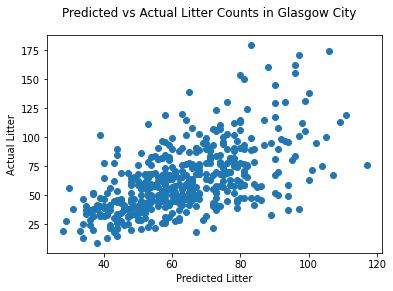

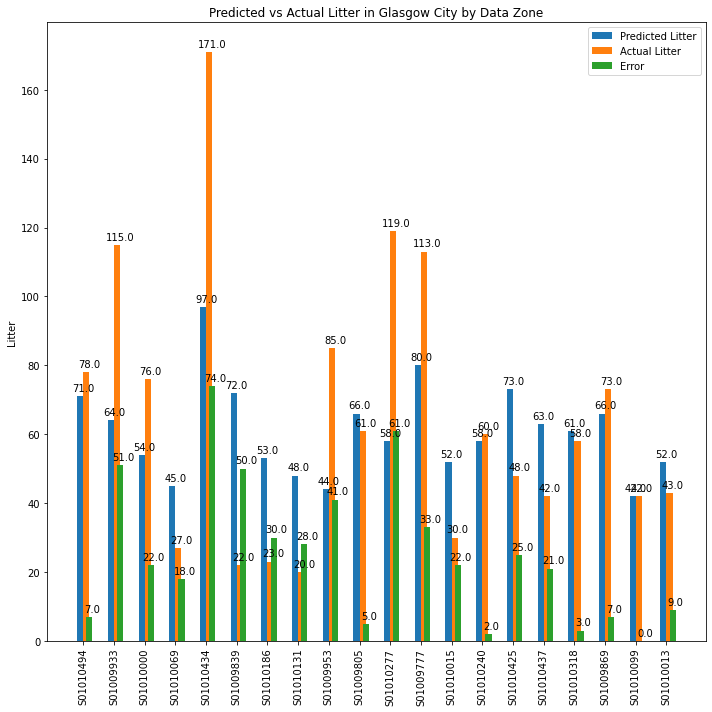

In [11]:
scatter_plot(model, X_train, y_train)
bar_plot(model, X_train, y_train)

### Validation

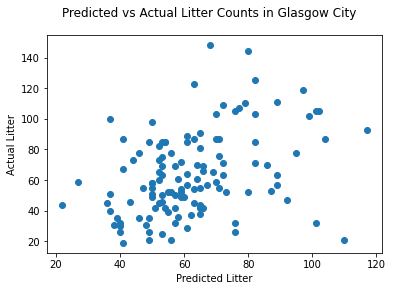

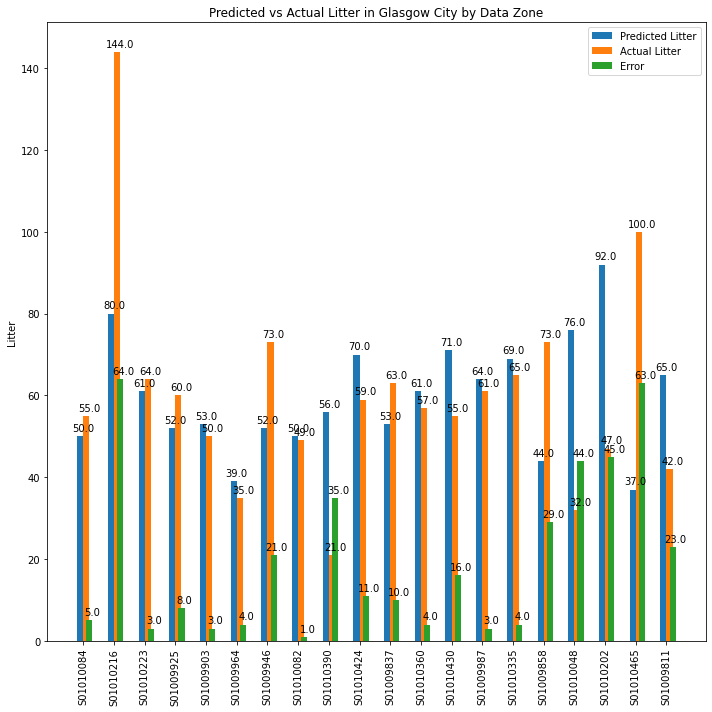

In [12]:
scatter_plot(model, X_valid, y_valid)
bar_plot(model, X_valid, y_valid)